In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Load Dataset
df = pd.read_csv(r"C:\Users\goura\OneDrive\Desktop\PythonProjects\Spam detection\spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [14]:
# Text Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

df['clean_message'] = df['message'].apply(clean_text)

C:\Users\goura\AppData\Local\Temp\ipykernel_10516\1579636166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette=['blue', 'red'])


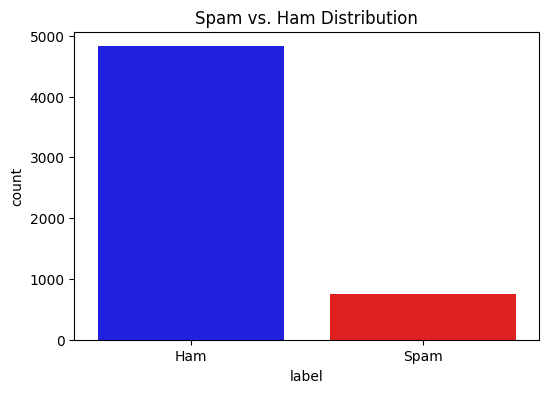

In [15]:
# Data Visualization - Spam vs. Ham Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], palette=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Ham', 'Spam'])
plt.title("Spam vs. Ham Distribution")
plt.show()

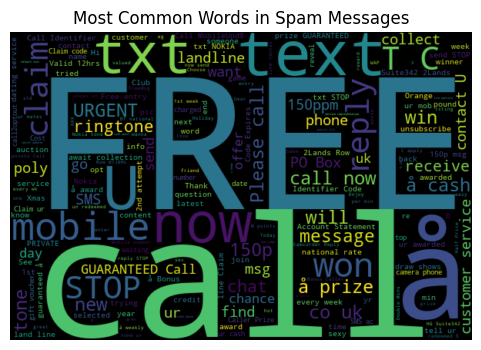

In [18]:
# WordCloud for Spam Messages
spam_words = ' '.join(df[df['label'] == 1]['message'])
wordcloud = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Spam Messages")
plt.show()

In [20]:
# Feature Extraction using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2), max_features=5000)
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

In [22]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Predictions
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

In [28]:
# Evaluate Model - Training Data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Data Evaluation:")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print(f"Precision: {train_precision * 100:.2f}%")
print(f"Recall: {train_recall * 100:.2f}%")
print(f"F1 Score: {train_f1 * 100:.2f}%\n")

# Evaluate Model - Test Data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Test Data Evaluation:")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision * 100:.2f}%")
print(f"Recall: {test_recall * 100:.2f}%")
print(f"F1 Score: {test_f1 * 100:.2f}%\n")

Training Data Evaluation:
Accuracy: 98.86%
Precision: 97.73%
Recall: 93.63%
F1 Score: 95.64%

Test Data Evaluation:
Accuracy: 97.85%
Precision: 94.37%
Recall: 89.33%
F1 Score: 91.78%



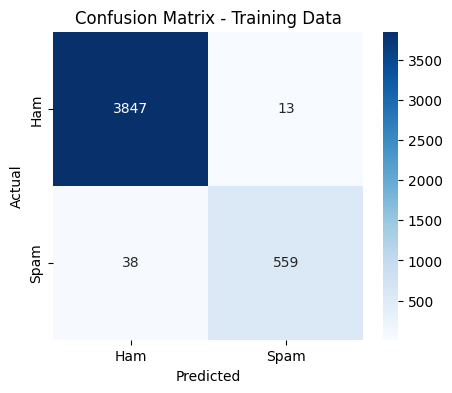

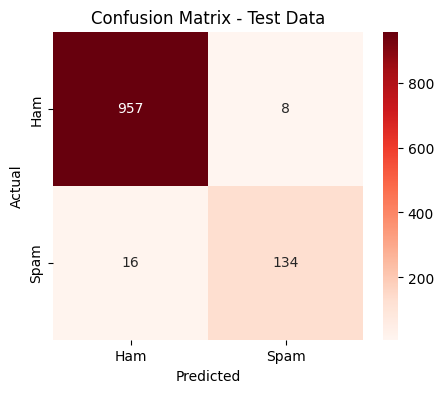

In [30]:
# Confusion Matrix - Training Data
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(5,4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Training Data")
plt.show()

# Confusion Matrix - Test Data
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Test Data")
plt.show()

In [32]:
# Classification Reports
print("Classification Report - Training Data:\n", classification_report(y_train, y_train_pred))
print("Classification Report - Test Data:\n", classification_report(y_test, y_test_pred))

Classification Report - Training Data:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3860
           1       0.98      0.94      0.96       597

    accuracy                           0.99      4457
   macro avg       0.98      0.97      0.97      4457
weighted avg       0.99      0.99      0.99      4457

Classification Report - Test Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.94      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



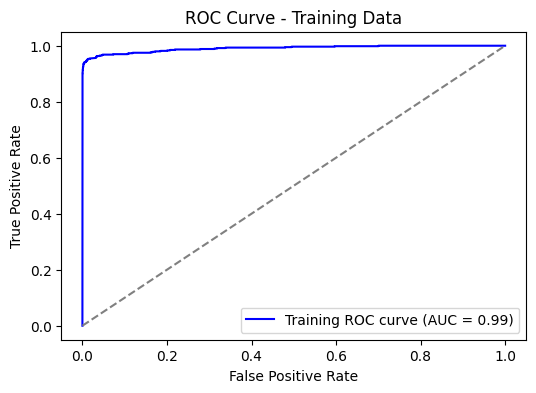

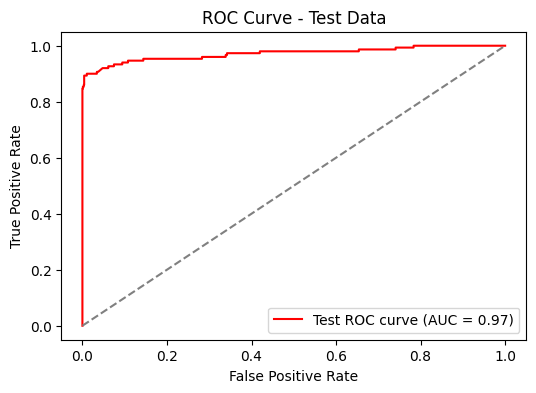

In [34]:
# ROC Curve - Training Data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(6, 4))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Training Data")
plt.legend()
plt.show()

# ROC Curve - Test Data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6, 4))
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Test Data")
plt.legend()
plt.show()

In [36]:
# User Input Prediction System
def predict_email():
    user_input = input("Enter an email message: ")
    processed_input = clean_text(user_input)
    transformed_input = vectorizer.transform([processed_input])
    prediction = model.predict(transformed_input)[0]
    print("\nPrediction: This is a", "Spam Email 🚨" if prediction == 1 else "Ham Email ✅")

# Call the function to take user input and predict
predict_email()

Enter an email message:  hello miss



Prediction: This is a Ham Email ✅
